Text(0.5, 1.0, 'Original image')

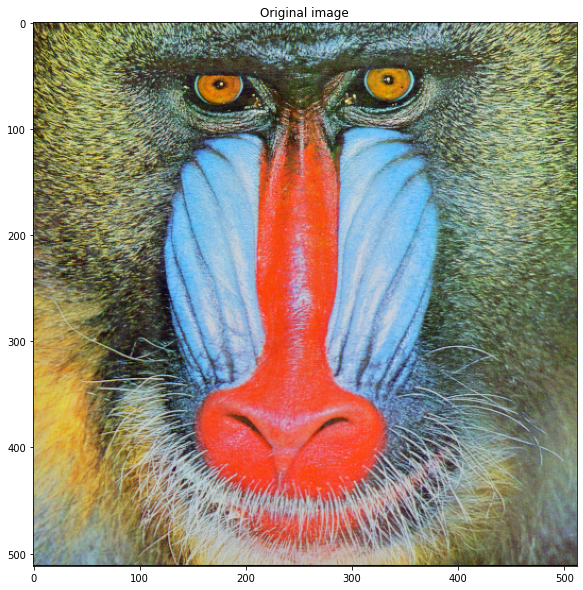

In [1]:
%matplotlib inline
from IPython.display import display, Math, Latex
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = 'https://i.pinimg.com/originals/62/d9/95/62d995e13a183d457d284fecb8c3f0e1.png'
response = requests.get(url)
input_img = Image.open(BytesIO(response.content))

# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(input_img, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")

In [3]:
def rgb2ycbcr(im):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = im.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return np.uint8(ycbcr)

def ycbcr2rgb(im):
    xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
    rgb = im.astype(np.float)
    rgb[:,:,[1,2]] -= 128
    return np.uint8(rgb.dot(xform.T))

Text(0.5, 1.0, 'HSI Image')

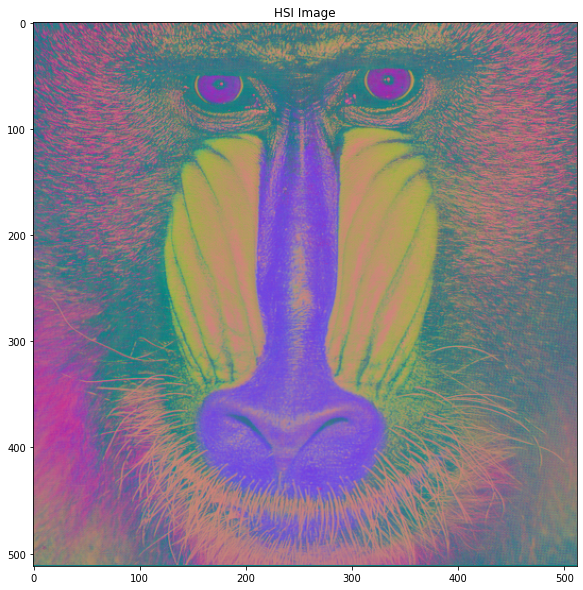

In [6]:
# Convert RGB image to YCbCr image
input_img = np.asarray(input_img)
output_image = rgb2ycbcr(input_img)

# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(output_image, cmap='gray', vmin=0, vmax=255)
plt.title("YCbCr Image")